In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sizes = [5, 10, 100, 200, 400, 600, 800, 1000]

# Дискретное распределение

## Генерация выборок выбранных случайных величин

In [ ]:
def P(x):
  t = 1/13
  return -t**x/(np.log(1-t) * x)

In [ ]:
P(2)

0.03696251623225594

In [ ]:
def log_dist_model(u):
  m0 = 1
  s = 0
  while s <= u:
    s += P(m0)
    if s > u:
      return m0
    m0 += 1

In [ ]:
df_log = dict() # словарь, где ключ - объем выборки, значение - 5 выборок с логарифмическим распределением
for n in sizes:
  np.random.seed(99)
  df_uni = np.random.uniform(size=(5, n))# 5 выборок размера n
  df_log[n] = [[log_dist_model(u) for u in df_uni[i]] for i in range(5)]

In [ ]:
df_log[10]

[[1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
 [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 2, 1, 1]]

## Построение эмпирической функции распределения

In [ ]:
def emp(df: list, x_lst: list): # Э.ф.р.
  return [np.sum(np.array(df) <= x) / len(df) for x in x_lst]

In [ ]:
emp(df_log[10][0], [1,2,3,4,5])

[0.9, 1.0, 1.0, 1.0, 1.0]

In [ ]:
def tdf(x_lst):
  res = []
  for x in x_lst:
    if x < 1:
      res.append(0)
    else:
      s = 0
      for k in range(1, int(x) + 1):
        s += 1 / (k * (13**k))
      s *= 1/np.log(13/12)
      res.append(s)
  return res

In [ ]:
tdf([-10, 1, 1.5, 1.9, 2, 2.5, 3])

[0,
 0.9610254220386545,
 0.9610254220386545,
 0.9610254220386545,
 0.9979879382709105,
 0.9979879382709105,
 0.9998834519238468]

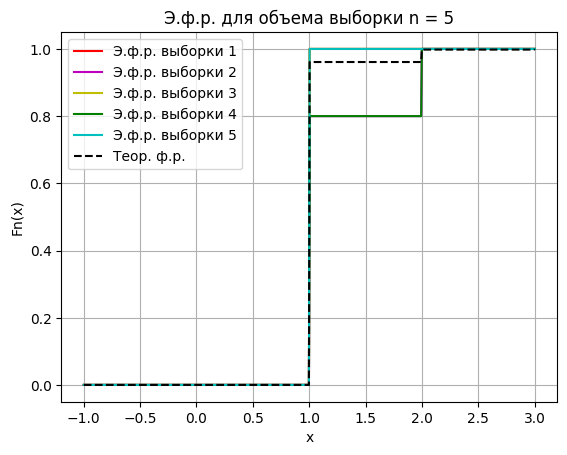

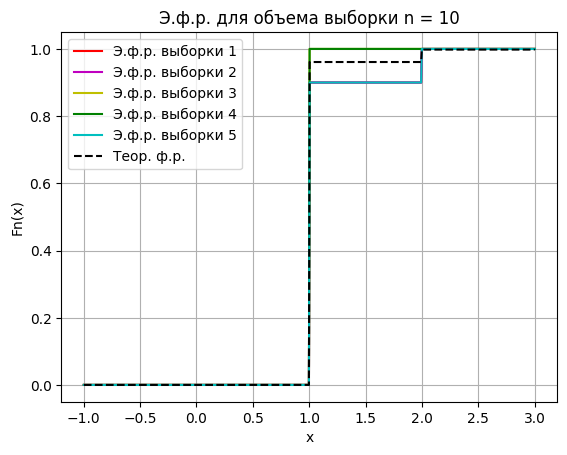

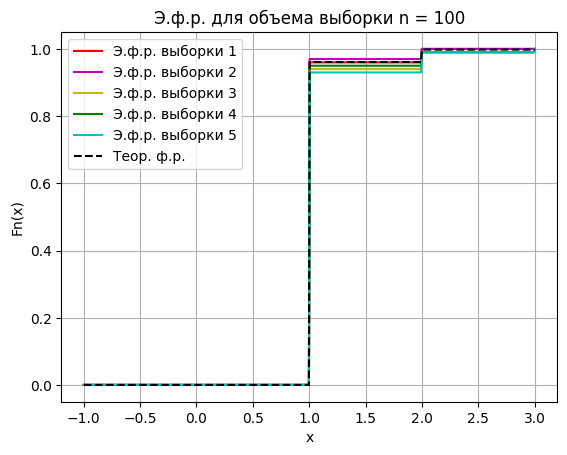

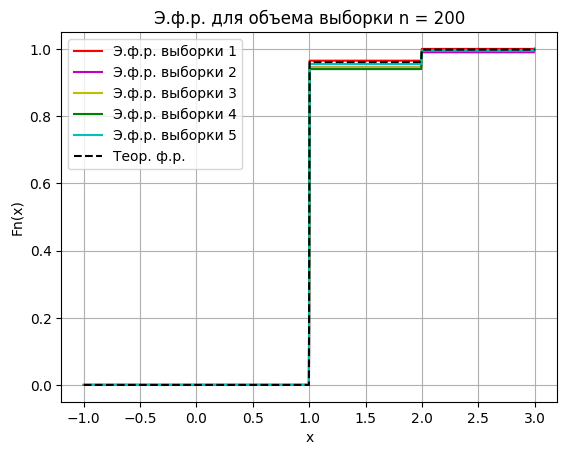

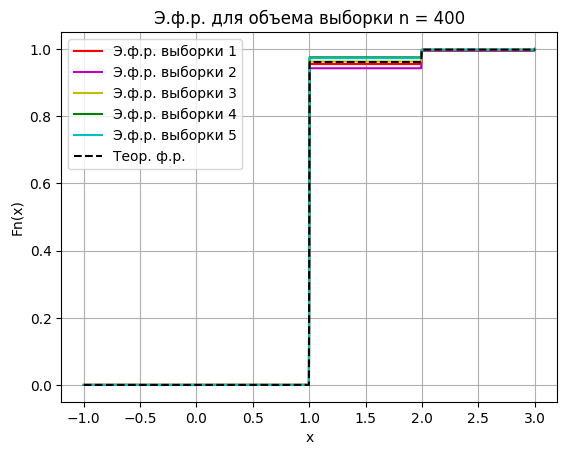

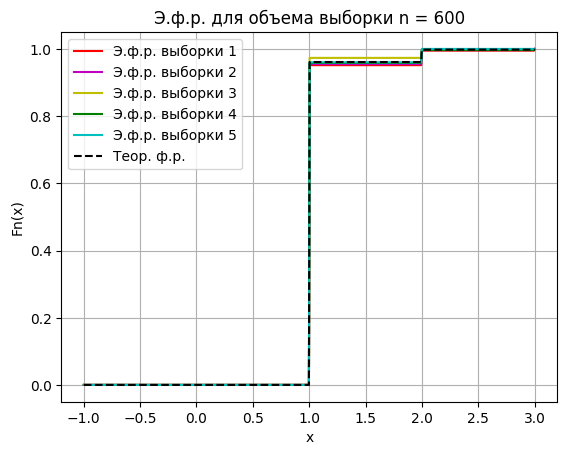

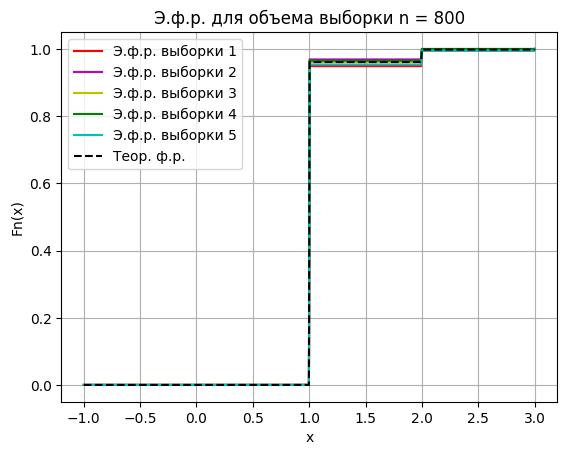

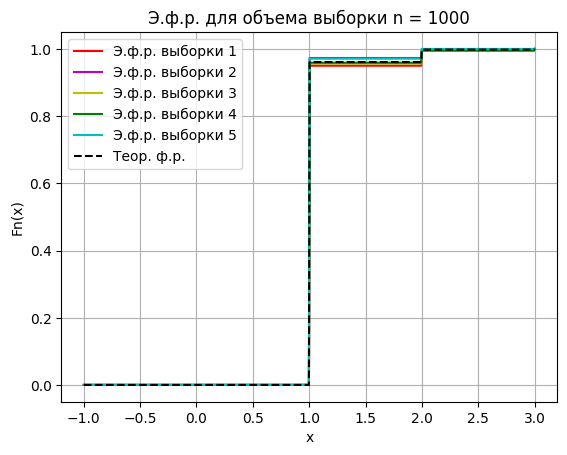

In [ ]:
for n in sizes:
  x = np.arange(-1, 3 + 2 * 3 / 100 * 0.1, 2 * 3 / 100 * 0.1)

  for i in range(5): # на одном графике отобразим э.ф.р. для 5 выборок одного объема
    plt.plot(x, emp(df_log[n][i], x), 'rmygc'[i])

  plt.plot(x, tdf(x), '--k')

  plt.legend(['Э.ф.р. выборки ' + str(i) for i in range(1, 6)] + ['Теор. ф.р.'])

  plt.grid(True)
  plt.xlabel('x')
  plt.ylabel('Fn(x)')
  plt.title(f'Э.ф.р. для объема выборки n = {n}')
  plt.show()

### $D_{m,n}$

In [ ]:
for n in sizes:
  for m in sizes:
      for i in range(5):
        for j in range(5):
          x_lst = df_log[n][i] + df_log[m][j] # будем рассматривать только те иксы, которые влияют на результат, т.е. те в которых есть переход на следующую ступеньку
          c = np.sqrt((n * m) / (n + m))
          differences = np.abs(np.array(emp(df_log[n][i], x_lst)) - np.array(emp(df_log[m][j], x_lst)))
          sup = np.max(differences)
          print(f'(n, m) = {n, m}' + (8 - len(str(n)) - len(str(m))) * ' ' + f' | (i, j) = {i, j} | D = {np.round(c * sup, 5)}')

## Построение гистограммы и полигона частот

In [ ]:
df_log[10]

In [ ]:
n = 10
arr_uniq, arr_freq = np.unique(df_log[n][4], return_counts=True)
print(arr_uniq, arr_freq / n)

In [ ]:
for n in sizes:
  arr_uniq, arr_freq = np.unique(df_log[n][4], return_counts=True)
  plt.plot(arr_uniq, arr_freq / n, 'r', marker='o')
  plt.plot(arr_uniq, [P(x) for x in arr_uniq], 'g', marker='o')
  plt.grid(True)
  plt.legend(['Относительная частота', 'Функция вероятности'])
  plt.title(f'Полигон частот для выборки объема n = {n}')
  plt.show()

## Вычисление выборочных моментов

In [ ]:
glist = np.array(df_log[10][4])
df_log[10][4]

In [ ]:
sample_av = glist.mean()
sample_var = np.mean((glist - sample_av)**2)

sample_av, sample_var

In [ ]:
df_log[10]

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i}$ | $\overline{{X}} = {np.round(sample_av, 5)}$ | $\overline{{S}}^2 = {np.round(sample_var, 5)}$')

In [ ]:
Mxi = 1 /(12 * np.log(13/12))
Dxi = - (13 * np.log(12/13) + 1)/(144 * (np.log(12/13))**2)
Mxi, Dxi

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i} \\Rightarrow |\overline{{X}} - M\\xi| = {np.round(np.abs(sample_av - Mxi), 5)}$; |$\overline{{S}}^2 - D\\xi| = {np.round(np.abs(sample_var - Dxi), 5)}$')

# Доп

In [ ]:
def plot_hist(n, n_bins):
    if n != 5:
      len_interval = (max(df_log[n][4]) - min(df_log[n][4])) / n_bins
      h = plt.hist(df_log[n][4], bins = n_bins, weights = [1 / (n * len_interval)] * n, color = 'g')
      assert(np.abs(h[1][1] - h[1][0] - len_interval) < 0.0001) # длина интервала
    else:
      len_interval = 1
      h = plt.hist(df_log[n][4], bins = n_bins, weights = [1 / n] * n,color = 'g')


    plt.plot(np.unique(df_log[n][4]), [P(x) for x in np.unique(df_log[n][4])], 'k', marker = 'o')
    #plt.plot(h[1][:-1] + len_interval / 2, h[0], 'r', marker = 'o')

    plt.grid(True)
    #plt.legend(['Функция вероятности', 'Полигон частот',  'Гистограмма частот'])
    plt.legend(['Функция вероятности',  'Гистограмма частот'])
    plt.title(f'Гистограмма частот для выборки объема n = {n}')
    plt.show()

In [ ]:
plot_hist(5, 1)

In [ ]:
plot_hist(10, 2)

In [ ]:
plot_hist(100, 3)

In [ ]:
plot_hist(100, 3)

In [ ]:
plot_hist(200, 3)

In [ ]:
plot_hist(400, 3)

In [ ]:
plot_hist(600, 2)

In [ ]:
plot_hist(800, 3)

In [ ]:
plot_hist(1000, 2)

# ДЗ 3

## Метод моментов

In [ ]:
t = 1/13
left = t / ((np.log(1-t))*(1-t))

In [ ]:
np.round(left, 5)

-1.04111

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    right = - df.mean()
    print(f'\item $(n, i) = {n, i}$ | $-\hat{{\\alpha_1}} = {np.round(right, 5)}$ | Абс. разница $= {np.round(np.abs(left - right), 5)}$')

\item $(n, i) = (5, 0)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 1)$ | $-\hat{\alpha_1} = -1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 2)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 3)$ | $-\hat{\alpha_1} = -1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 4)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 0)$ | $-\hat{\alpha_1} = -1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 1)$ | $-\hat{\alpha_1} = -1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 2)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 3)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 4)$ | $-\hat{\alpha_1} = -1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (100, 0)$ | $-\hat{\alpha_1} = -1.04$ | Абс. разница $= 0.00111$
\item $(n, i) = (100, 1)$ | $-\hat{\alpha_1} = -1.03$ | Абс. разница $= 0.01111$
\item $(n, i) = (100, 2)$ | $-\hat{\alpha_1} = -1.07$

## Оптимальные оценки

In [ ]:
tau = - t / ((np.log(1-t))*(1-t))

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    sample_av = df.mean()
    print(f'\item $(n, i) = {n, i}$ | $\\overline{{X}} = {np.round(sample_av, 5)}$ | Абс. разница $= {np.round(np.abs(sample_av - tau), 5)}$')

\item $(n, i) = (5, 0)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 1)$ | $\overline{X} = 1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 2)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 3)$ | $\overline{X} = 1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 4)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 0)$ | $\overline{X} = 1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 1)$ | $\overline{X} = 1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 2)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 3)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 4)$ | $\overline{X} = 1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (100, 0)$ | $\overline{X} = 1.04$ | Абс. разница $= 0.00111$
\item $(n, i) = (100, 1)$ | $\overline{X} = 1.03$ | Абс. разница $= 0.01111$
\item $(n, i) = (100, 2)$ | $\overline{X} = 1.07$ | Абс. разница $= 0.02889$
\item $(n, i) = (100, 3)

In [ ]:
tau

1.0411108738752088

## Реальные данные

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("simple_features_test.csv")
data.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17370.0,222768.0,180000.0,99000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69777.0,663264.0,630000.0,202500.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
3,49018.5,1575000.0,1575000.0,315000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,32067.0,625500.0,625500.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ins = pd.read_excel("OnlineDataSet_JohnsonWatermanHall.xlsx")
ins.head()

,Chamber,CO2,Root nodules,Root DW,Shoot DW,Total DW,Nodule density,%N,%C,C:N
0,6,eCO2,39,0.43,0.70,1.13,90.57,NaN,NaN,NaN
1,6,eCO2,15,0.87,1.08,1.95,17.27,2.67,42.21,15.78
2,1,aCO2,6,0.55,0.23,0.77,10.96,NaN,NaN,NaN
3,3,aCO2,17,0.69,0.80,1.49,24.58,3.09,41.20,13.32
4,4,eCO2,44,0.52,0.91,1.43,84.50,NaN,NaN,NaN


In [ ]:
dd = pd.read_excel("Plot_summary_data.xlsx")
dd.head()

,Plot_code,Region,Latitude,Longitude,AGB,WP,WL,μ,Contributors
0,AGJ-01,W,-11.9,-71.3,136.08,2.06,1.90,2.21,John Terborgh
1,AGP-01,W,-3.7,-70.3,127.04,3.55,2.70,1.28,Oliver Phillips; Agustin Rudas; Alvaro Cogollo...
2,AGP-02,W,-3.7,-70.3,128.79,4.34,6.16,4.75,Oliver Phillips; Agustin Rudas; Alvaro Cogollo...
3,ALF-01,BrSh,-9.6,-55.9,97.25,1.79,0.96,1.29,Ted Feldpausch; Beatriz Marimon; Ben Hur Marim...
4,ALM-01,W,-11.8,-71.5,125.60,2.97,2.91,1.82,John Terborgh; Roel Brienen
